<a href="https://colab.research.google.com/github/nour-ezzehi/Travail-des-Femmes-Agricultrices/blob/main/model_crafting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report


🔹 Classification Report for Troubles cardio-respiratoires:

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.17      0.29         6

    accuracy                           0.69        16
   macro avg       0.83      0.58      0.54        16
weighted avg       0.79      0.69      0.61        16


🔹 Classification Report for Troubles cognitifs:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        12
           1       0.00      0.00      0.00         4

    accuracy                           0.75        16
   macro avg       0.38      0.50      0.43        16
weighted avg       0.56      0.75      0.64        16


🔹 Classification Report for Troubles neurologiques:

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.00      0.00      0.00         5

    accuracy     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


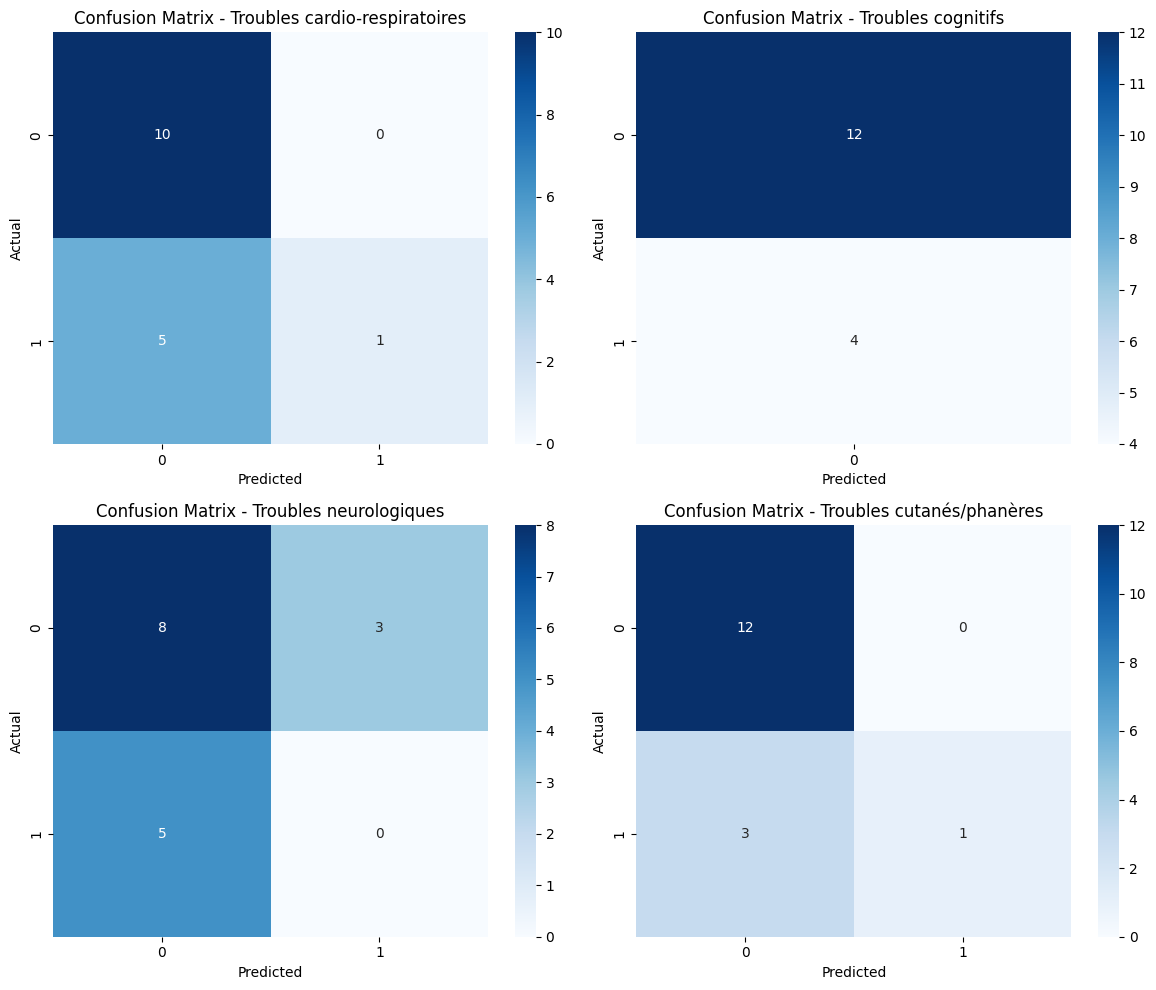

In [9]:
data = pd.read_csv("sample_data/cleaned_data.csv")  # Replace with actual dataset

# Define features and multi-label targets
features = [
    "Age", "Situation maritale", "Nb pers à charge", "Profession du mari",
    "Niveau socio-économique", "Fumées de Tabouna", "nombre_des_taches",
    "bus / transport public", "a pieds, camion non protégé", "a pieds, bus / transport public",
    "voiture", "a pieds, charette", "a pieds, camion non protégé, charette",
    "a pieds, voiture", "camion non protégé", "bus / transport public, camion non protégé",
    "BMI", "Domicile_monastir", "Domicile_sfax", "H_travail_sem",
    "Masque pour pesticides", "Bottes", "Gants", "Casquette/Mdhalla", "TAS", "Tabagisme_Neffa"
]

targets = [
    "Troubles cardio-respiratoires", "Troubles cognitifs",
    "Troubles neurologiques", "Troubles cutanés/phanères"
]
X = data[features]
y = data[targets]  # Multi-label target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train a Multi-Label Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_label_model = MultiOutputClassifier(rf)
multi_label_model.fit(X_train, y_train)

# Predictions
y_pred = multi_label_model.predict(X_test)

# Evaluate model
for i, target in enumerate(targets):
    print(f"\n🔹 Classification Report for {target}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
for i, target in enumerate(targets):
    cm = pd.crosstab(y_test.iloc[:, i], y_pred[:, i], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {target}')

plt.tight_layout()
plt.show()

📊 Analysis of Model Performance
The classification reports show imbalanced performance across different target variables. Let's break it down:

🔹 Troubles cardio-respiratoires
Accuracy: 69% → Not bad, but we need to analyze class balance.
Precision (Class 1): 1.00 → When the model predicts class 1, it's always correct.
Recall (Class 1): 0.17 → Very low. The model is missing a lot of actual 1s.
💡 Issue: The model is biased toward class 0, detecting almost all 0s but missing most 1s.

🔹 Troubles cognitifs
Accuracy: 75% → Looks okay at first glance.
Recall (Class 1): 0.00 → The model never detects class 1 (serious issue).
Precision (Class 1): 0.00 → When it predicts class 1, it's never correct.
💡 Issue: The model completely ignores class 1, meaning it fails to identify people with cognitive issues.

🔹 Troubles neurologiques
Accuracy: 50% → Equivalent to random guessing.
Precision (Class 1): 0.00 → Again, model fails to classify 1s.
Recall (Class 1): 0.00 → Misses all 1s.
💡 Issue: Severe class imbalance—model is completely failing for positive cases.

🔹 Troubles cutanés/phanères
Accuracy: 81% → Best result so far.
Precision (Class 1): 1.00 → Perfect precision means no false positives.
Recall (Class 1): 0.25 → Very low recall, meaning it detects very few positive cases.
💡 Issue: Even with high accuracy, the model struggles with 1s.

🛠️ Why Is This Happening?
Severe Class Imbalance
If most samples are 0, the model prefers predicting 0 to maximize accuracy.
It results in very low recall for 1 (i.e., it misses most of them).
Small Dataset (Only 16 Test Samples)
Hard to make conclusions from such a tiny test set.
A few misclassifications can make accuracy drop significantly.
